In [1]:
import tweepy
from tweepy import OAuthHandler
import xlsxwriter
import pandas as pd
from textblob import TextBlob 
%matplotlib inline
import matplotlib.pyplot as plt
from time import sleep
from datetime import datetime
import numpy as np

import twitterCredentials

In [2]:
api_key = twitterCredentials.api_key
api_secret = twitterCredentials.api_secret
access_token = twitterCredentials.access_token
access_secret = twitterCredentials.access_secret

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
header = ["Date", "Day", "Tweet", "Retweets", "Likes"]

#Create a new book
#book = xlsxwriter.Workbook('DataNYT.xlsx')
book = xlsxwriter.Workbook('DataCNN.xlsx')
sheet = book.add_worksheet('Data')
row = 0
col = 0
 
# Pivot the header
for title in header:
    sheet.write(row, col, title)
    col += 1
row = 1

#Twitter account
#name = "nytimes"
name = "CNN"

#Get the last 500 tweets
timeline = api.user_timeline(id=name, count=200 )

#Save into the book
for tweet in timeline:
    print(tweet.text)
    data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
    col = 0
    
    for text in data:
        sheet.write(row, col, text)
        col += 1
    row += 1
    
book.close()

The Duke of Sussex breaks his silence after announcing he and Meghan will end their royal duties, expressing “great… https://t.co/PTy8DIisCM
The FBI and local law enforcement are working together regarding "threats of violence" and Virginia clergy leaders… https://t.co/KHAjdsY25o
A stray cat in Wisconsin had her ears removed due to chronic and painful infections. When shelter employees worried… https://t.co/T7L4zyIjhW
At least two Honolulu police officers have died in a shooting, a report says, and the suspect appears to have set a… https://t.co/HE0pO1Z958
The third installment in the Bad Boys franchise, which stars Will Smith and Martin Lawrence as two detectives in Mi… https://t.co/zBywc81uHz
JUST IN: At least two Honolulu police officers have died in a shooting in the Diamond Head area, a report says, and… https://t.co/dOEXcuYMCr
It's nearly unheard of for a federal prosecutors' office to investigate one of its own, but in 1985, the Manhattan… https://t.co/K0BCojdQ2d
Republican Sen.

In [5]:
datos_excel = pd.read_excel(open('DataNYT.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)

datos_excel2 = pd.read_excel(open('DataCNN.xlsx','rb'))
datos_excel2 = pd.DataFrame(datos_excel2)

In [6]:
# For NYT

popularity_list = []
num_list = []
num = 1

for tweet in datos_excel['Tweet']:
    print(tweet)
    
    analysis = TextBlob(tweet)
    analysis = analysis.sentiment
    print(analysis)
    popularity = analysis.polarity
    popularity_list.append(popularity)
    num_list.append(num)
    num = num + 1

Chinese authorities said on Sunday that 17 more people had been infected with a mysterious new virus, raising quest… https://t.co/PcNwGww3xW
Sentiment(polarity=0.1590909090909091, subjectivity=0.48863636363636365)
Senator Cory Gardner of Colorado hasn't held a town hall-style meeting in 2 years. Why? He's avoiding attention abo… https://t.co/N7J6y5lSyg
Sentiment(polarity=0.0, subjectivity=0.0)
2 police officers were shot in Honolulu after a gunman opened fire on Sunday afternoon, authorities said
https://t.co/9qFfOPgiFW
Sentiment(polarity=0.0, subjectivity=0.0)
“Unclear on why there’s a need for camouflage…in space…” "Star Trek" actor George Takei wrote on Twitter
https://t.co/Jmcm4XbP8s
Sentiment(polarity=0.0, subjectivity=0.0)
Rutgers University is expected to name its first black president, Jonathan Holloway, on Tuesday, a school official… https://t.co/coCG6EInfT
Sentiment(polarity=-0.005555555555555554, subjectivity=0.3888888888888889)
8 years and counting of civil war in Syria hav

Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
New York Public Library system, the largest of its kind in the United States, has crunched the numbers to come up w… https://t.co/dZ2r3BHZg8
Sentiment(polarity=0.24545454545454545, subjectivity=0.4737373737373738)
From the beginning, T Kira Madden and Hannah Beresford found an easy cadence, first through horses, then writing https://t.co/Zk0s7usk1m
Sentiment(polarity=0.3416666666666667, subjectivity=0.5833333333333334)
A community of artists is offering a new way for pet owners to grieve the death of their pets: by spinning yarn and… https://t.co/DFtPCnpxW1
Sentiment(polarity=0.018181818181818174, subjectivity=0.32727272727272727)
The Summer Olympics are just the beginning. With an unmatched food scene, cutting-edge architecture and rich cultur… https://t.co/KzuKZ853yr
Sentiment(polarity=0.375, subjectivity=0.75)
Among 20 of the most powerful people in government environment jobs, most have ties to the fossil fue

Sentiment(polarity=0.2, subjectivity=0.3)
Ukraine's prime minister, an ally of President Volodymyr Zelensky, offered to resign after audio leaks appeared to… https://t.co/zxk8jjH8Fm
Sentiment(polarity=0.0, subjectivity=0.0)
The Democrats running for president have spent millions on Facebook ads. Our analysis of where they're spending mos… https://t.co/66XbJX93fm
Sentiment(polarity=-0.1, subjectivity=0.1)
The chief executive of the Recording Academy, Deborah Dugan, was removed less than 3 weeks after she filed a memo t… https://t.co/bx21CPpw6r
Sentiment(polarity=-0.16666666666666666, subjectivity=0.06666666666666667)
Joe Bryan has maintained his innocence since he was convicted of murdering his wife in 1985. The highest criminal c… https://t.co/KnxZLYITPi
Sentiment(polarity=-0.4, subjectivity=0.55)
The Salzburg Festival celebrates its 100th year this summer, when the Austrian city will be the Disneyland of class… https://t.co/GPyg9kZIlL
Sentiment(polarity=0.0, subjectivity=0.0)
"The bro

In [7]:
# For CNN

popularity_list2 = []
num_list2 = []
num2 = 1

for tweet2 in datos_excel2['Tweet']:
    print(tweet2)
    
    analysis2 = TextBlob(tweet2)
    analysis2 = analysis2.sentiment
    print(analysis2)
    popularity2 = analysis2.polarity
    popularity_list2.append(popularity2)
    num_list2.append(num2)
    num2 = num2 + 1

The Duke of Sussex breaks his silence after announcing he and Meghan will end their royal duties, expressing “great… https://t.co/PTy8DIisCM
Sentiment(polarity=0.0, subjectivity=0.0)
The FBI and local law enforcement are working together regarding "threats of violence" and Virginia clergy leaders… https://t.co/KHAjdsY25o
Sentiment(polarity=0.0, subjectivity=0.0)
A stray cat in Wisconsin had her ears removed due to chronic and painful infections. When shelter employees worried… https://t.co/T7L4zyIjhW
Sentiment(polarity=-0.4125, subjectivity=0.6375)
At least two Honolulu police officers have died in a shooting, a report says, and the suspect appears to have set a… https://t.co/HE0pO1Z958
Sentiment(polarity=-0.3, subjectivity=0.4)
The third installment in the Bad Boys franchise, which stars Will Smith and Martin Lawrence as two detectives in Mi… https://t.co/zBywc81uHz
Sentiment(polarity=-0.3499999999999999, subjectivity=0.3333333333333333)
JUST IN: At least two Honolulu police officers 

Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
This 9-year-old is bringing awareness to Dyslexia calling it his "superpower" in a viral video https://t.co/HPyPWrHwgJ
Sentiment(polarity=0.0, subjectivity=0.0)
"I had to believe that coming forward would help me reclaim my voice and help others reclaim theirs," presidential… https://t.co/IHBBd2wPfS
Sentiment(polarity=0.0, subjectivity=0.0)
Facing fears of public health and safety concerns, local officials have taken steps to clear the encampment by Janu… https://t.co/GDHD82CjBo
Sentiment(polarity=0.03333333333333334, subjectivity=0.15)
Three brothers from Scotland have set three world records after rowing 3,000 miles across the Atlantic Ocean in 35… https://t.co/vmL4bpKqCU
Sentiment(polarity=0.0, subjectivity=0.0)
Rough waves in the Atlantic Ocean — where Crew Dragon is expected to land after the test flight — prompted SpaceX t… https://t.co/Nz9X7KMyyj
Sentiment(polarity=-0.1, subjectivity=0.4)
Donning their ico

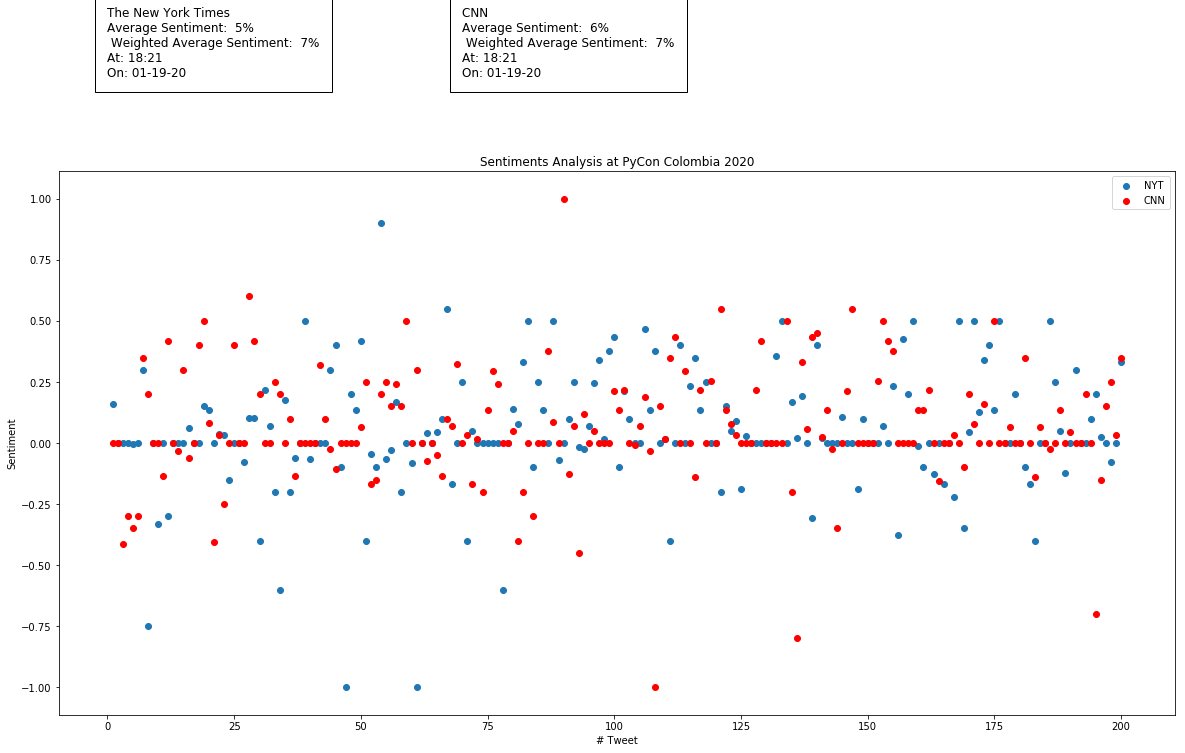

In [10]:
#Calcular el promedio de polaridad, NOTA: No es promedio ponderado
averagePolarity = (sum(popularity_list))/(len(popularity_list))
averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

#Calcular el promedio ponderado
weighted_avgPolarity = np.average(popularity_list, weights=num_list)
weighted_avgPolarity = "{0:.0f}%".format(weighted_avgPolarity * 100)

#Calcular el promedio de polaridad, NOTA: No es promedio ponderado
averagePolarity2 = (sum(popularity_list2))/(len(popularity_list2))
averagePolarity2 = "{0:.0f}%".format(averagePolarity2 * 100)
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

#Calcular el promedio ponderado
weighted_avgPolarity2 = np.average(popularity_list2, weights=num_list2)
weighted_avgPolarity2 = "{0:.0f}%".format(weighted_avgPolarity2 * 100)

plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list, label='NYT')
plt.scatter(num_list2, popularity_list2, c='red', label='CNN')
#plt.scatter(datos_excel['Day'], popularity_list)
plt.title("Sentiments Analysis at PyCon Colombia 2020")
plt.xlabel("# Tweet")
plt.ylabel("Sentiment")
plt.text(0, 1.5, "The New York Times \n" + "Average Sentiment:  " + str(averagePolarity) + "\n" + " Weighted Average Sentiment:  " + str(weighted_avgPolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))
plt.text(70, 1.5, "CNN \n" + "Average Sentiment:  " + str(averagePolarity2) + "\n" + " Weighted Average Sentiment:  " + str(weighted_avgPolarity2) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))
plt.legend()
plt.show()

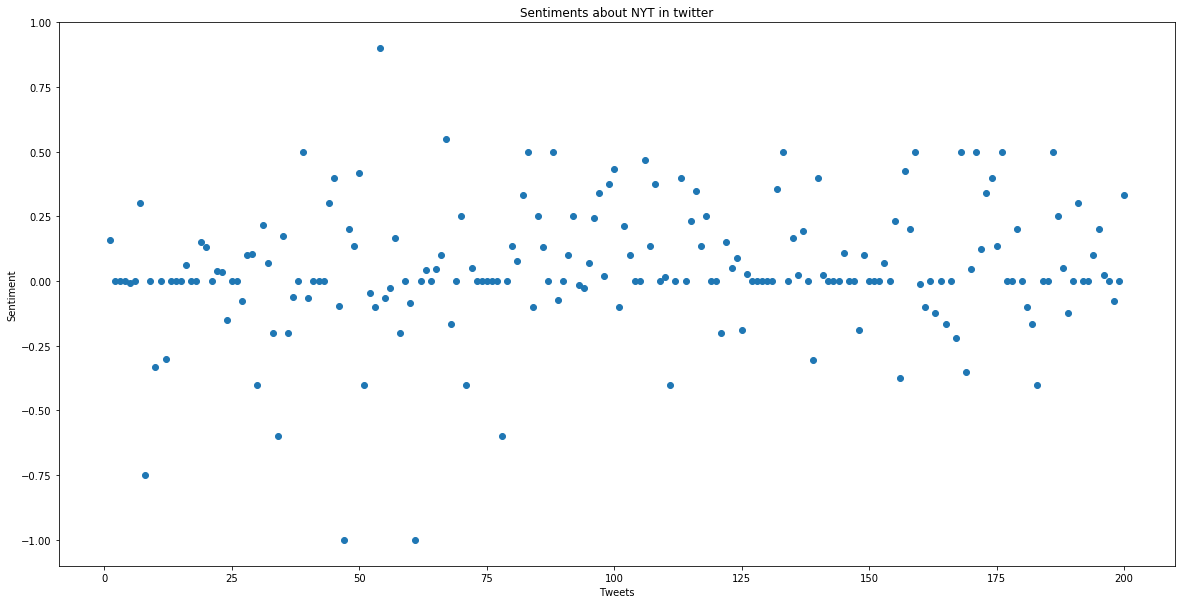

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list)
#plt.scatter(datos_excel['Day'], popularity_list)
plt.title("Sentiments about NYT in twitter")
plt.xlabel("Tweets")
plt.ylabel("Sentiment")
plt.show()